# Seoul Bike Sharing Demand Analysis

**Group 2: Xiao Hu, Vinky Wang, Izzy Zhang**

## Introduction

## Preliminary Results
### Reading the Data
We will first read in the `SeoulBikeData.csv` and load packages that we will use for the analyses.

In [1]:
# Load data
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00560/SeoulBikeData.csv"
bike = read.csv(url,check.names=F)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.6     ✔ dplyr   1.0.7
✔ tidyr   1.1.4     ✔ stringr 1.4.1
✔ readr   2.1.1     ✔ forcats 0.5.1
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Attaching package: ‘lubridate’


The following objects are masked from ‘package:base’:

    date, intersect, setdiff, union


corrplot 0.92 loaded

Loading required package: carData


Attaching package: ‘car’


The following object is masked from ‘package:dplyr’:

    recode


The following object is masked from ‘package:purrr’:

    some




In [13]:
# Load packages
library(tidyverse)
library(lubridate)
library(corrplot)
library(car)
library(repr)

### Data Pre-processing
Now we will do some data cleaning and wrangling to get our data into a tidy format.

In [2]:
# Rename columns
colnames(bike) <- c("date", "count", "hour", "temp", "humidity", "windspeed", "visibility", "dew", "solar", "rain", "snow", "seasons", "holiday", "functioning")

In [7]:
# Convert variable into different classes
bike <- bike %>%
  mutate(date = as.POSIXct(date, format = "%d/%m/%Y"), # date
         month =  factor(months(date)),      # add months variable
         seasons = factor(seasons), # factor
         holiday = factor(holiday), # factor
         functioning = factor(functioning)) # factor

In [8]:
# Peak of our data
glimpse(bike)

Rows: 8,760
Columns: 15
$ date        <dttm> 2017-12-01, 2017-12-01, 2017-12-01, 2017-12-01, 2017-12-0…
$ count       <int> 254, 204, 173, 107, 78, 100, 181, 460, 930, 490, 339, 360,…
$ hour        <int> 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, …
$ temp        <dbl> -5.2, -5.5, -6.0, -6.2, -6.0, -6.4, -6.6, -7.4, -7.6, -6.5…
$ humidity    <int> 37, 38, 39, 40, 36, 37, 35, 38, 37, 27, 24, 21, 23, 25, 26…
$ windspeed   <dbl> 2.2, 0.8, 1.0, 0.9, 2.3, 1.5, 1.3, 0.9, 1.1, 0.5, 1.2, 1.3…
$ visibility  <int> 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 1928…
$ dew         <dbl> -17.6, -17.6, -17.7, -17.6, -18.6, -18.7, -19.5, -19.3, -1…
$ solar       <dbl> 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.01, 0.23…
$ rain        <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0…
$ snow        <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0…
$ seasons     <fct> Winter, Winter, Winter, Winter, Winter, Winter, Winter, Wi…
$ holiday     <f

In [9]:
head(bike, 10)

,date,count,hour,temp,humidity,windspeed,visibility,dew,solar,rain,snow,seasons,holiday,functioning,month
,<dttm>,<int>,<int>,<dbl>,<int>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<fct>,<fct>,<fct>
1,2017-12-01,254,0,-5.2,37,2.2,2000,-17.6,0.00,0,0,Winter,No Holiday,Yes,December
2,2017-12-01,204,1,-5.5,38,0.8,2000,-17.6,0.00,0,0,Winter,No Holiday,Yes,December
3,2017-12-01,173,2,-6.0,39,1.0,2000,-17.7,0.00,0,0,Winter,No Holiday,Yes,December
4,2017-12-01,107,3,-6.2,40,0.9,2000,-17.6,0.00,0,0,Winter,No Holiday,Yes,December
5,2017-12-01,78,4,-6.0,36,2.3,2000,-18.6,0.00,0,0,Winter,No Holiday,Yes,December
6,2017-12-01,100,5,-6.4,37,1.5,2000,-18.7,0.00,0,0,Winter,No Holiday,Yes,December
7,2017-12-01,181,6,-6.6,35,1.3,2000,-19.5,0.00,0,0,Winter,No Holiday,Yes,December
8,2017-12-01,460,7,-7.4,38,0.9,2000,-19.3,0.00,0,0,Winter,No Holiday,Yes,December
9,2017-12-01,930,8,-7.6,37,1.1,2000,-19.8,0.01,0,0,Winter,No Holiday,Yes,December


In [10]:
summary(bike)

      date                         count             hour      
 Min.   :2017-12-01 00:00:00   Min.   :   0.0   Min.   : 0.00  
 1st Qu.:2018-03-02 00:00:00   1st Qu.: 191.0   1st Qu.: 5.75  
 Median :2018-06-01 00:00:00   Median : 504.5   Median :11.50  
 Mean   :2018-06-01 00:20:52   Mean   : 704.6   Mean   :11.50  
 3rd Qu.:2018-08-31 00:00:00   3rd Qu.:1065.2   3rd Qu.:17.25  
 Max.   :2018-11-30 00:00:00   Max.   :3556.0   Max.   :23.00  
                                                               
      temp           humidity       windspeed       visibility  
 Min.   :-17.80   Min.   : 0.00   Min.   :0.000   Min.   :  27  
 1st Qu.:  3.50   1st Qu.:42.00   1st Qu.:0.900   1st Qu.: 940  
 Median : 13.70   Median :57.00   Median :1.500   Median :1698  
 Mean   : 12.88   Mean   :58.23   Mean   :1.725   Mean   :1437  
 3rd Qu.: 22.50   3rd Qu.:74.00   3rd Qu.:2.300   3rd Qu.:2000  
 Max.   : 39.40   Max.   :98.00   Max.   :7.400   Max.   :2000  
                                 

We see that our data is now in tidy format since all column headers correspond to variable names, variables are only stored in columns, and there is one variable per column (Wickham, 2014). 

### Exploratory Data Analysis
We will conduct an exploratory data analysis to explore questions mentioned in the introduction and get a better sense of our data.

Let's first look at the overall distribution of bike rentals across time. 

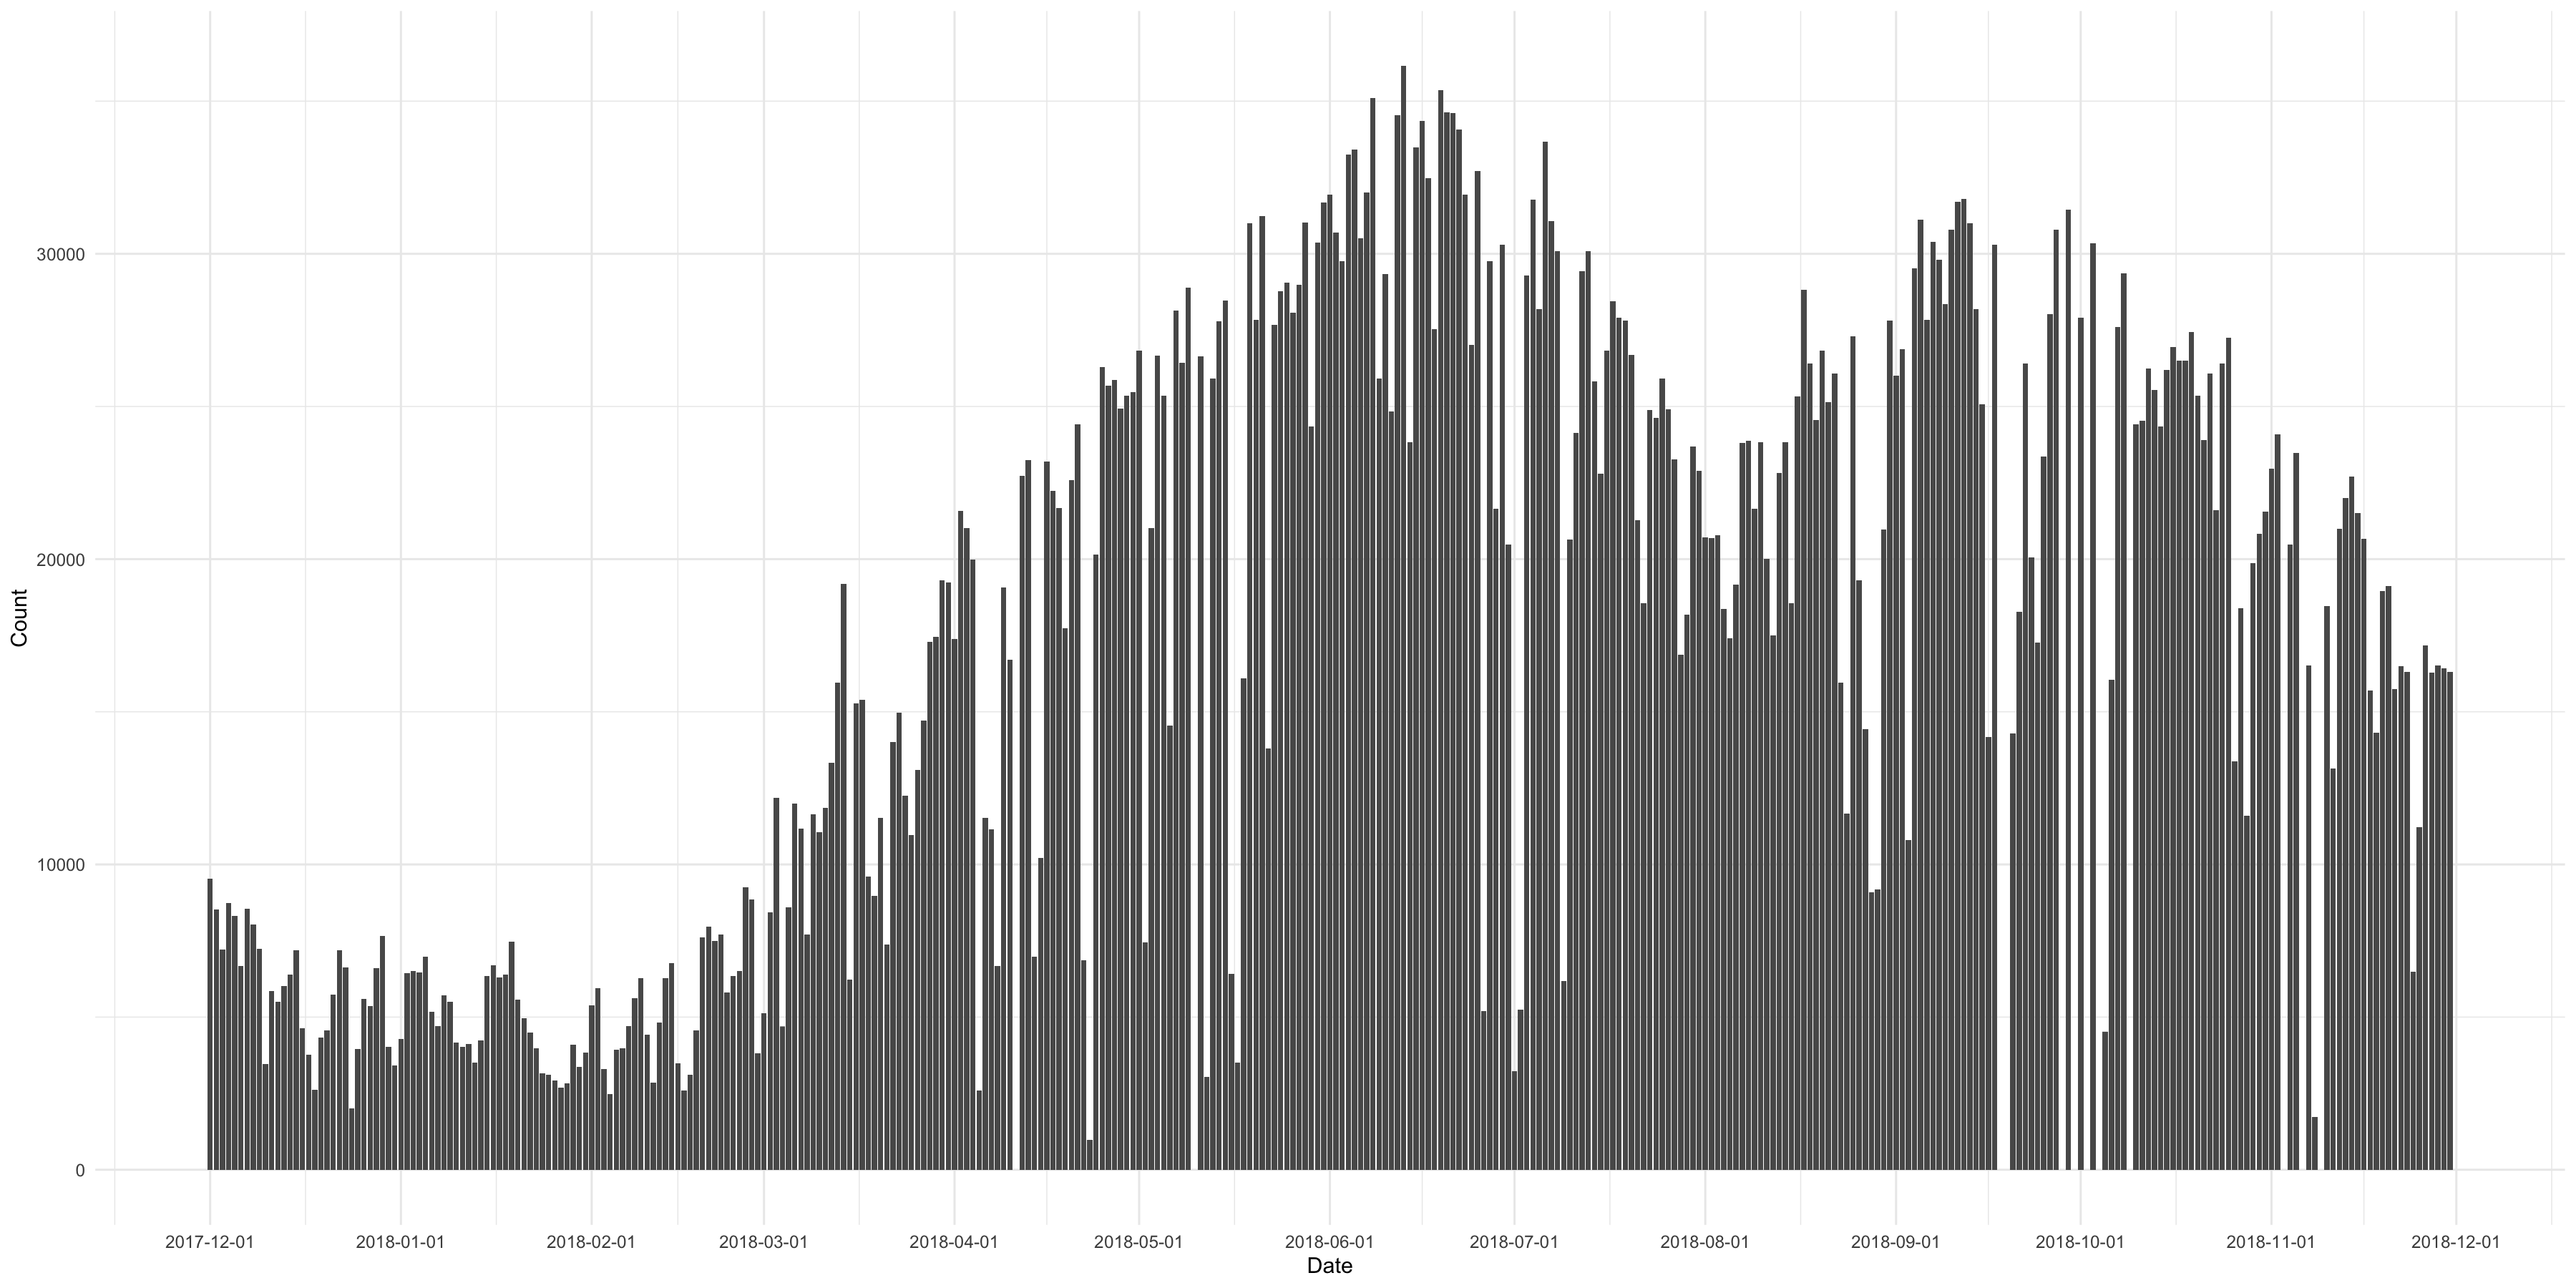

In [24]:
# Plot daily counts
options(repr.plot.width = 18, repr.plot.height = 9)

bike %>%
  ggplot(aes(x=date, y = count)) + 
  geom_col() +
  scale_x_datetime(breaks = "1 month") + 
  ylab("Count") +
  xlab("Date") + 
  theme_minimal() + 
  theme(legend.position = "none")

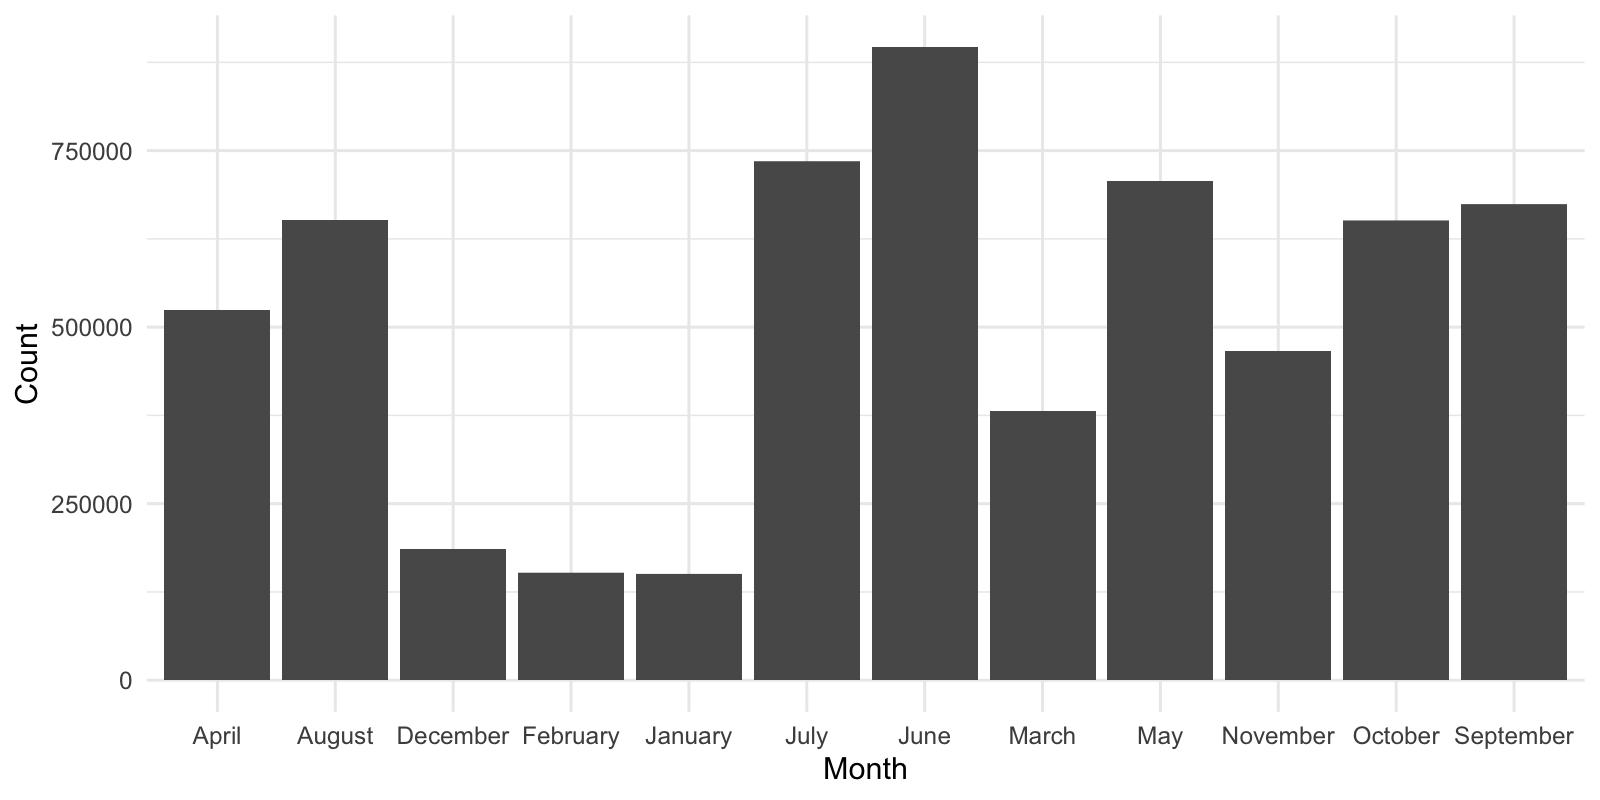

In [31]:
# Plot monthly counts
options(repr.plot.width = 8, repr.plot.height = 4)

bike %>%
  ggplot(aes(month, count)) +
  geom_col() +
  ylab("Count") +
  xlab("Month") + 
  theme_minimal() + 
  theme(legend.position = "none")

It appears that the most number of rentals was during the summer months of 2018 and that June and July tend to be the most popular months for rentals. 

### Multi-collinearity
Now we will identify variables that are correlated with one another and select a subset of the dataset that minimizes multicollinearity. 

In [34]:
# Select only numeric environmental variables
bike_var <- bike %>%
  select(c(temp, humidity, windspeed, visibility, dew, solar, rain, snow))

In [35]:
# Correlation matrix
cor_matrix <- cor(bike_var)
cor_matrix

,temp,humidity,windspeed,visibility,dew,solar,rain,snow
temp,1.00000000,0.1593708,-0.036251701,0.03479443,0.91279822,0.35350547,0.050281859,-0.218404862
humidity,0.15937080,1.0000000,-0.336683042,-0.54309034,0.53689449,-0.46191880,0.236396670,0.108183453
windspeed,-0.03625170,-0.3366830,1.000000000,0.17150714,-0.17648569,0.33227425,-0.019674089,-0.003554186
visibility,0.03479443,-0.5430903,0.171507137,1.00000000,-0.17662973,0.14973803,-0.167629238,-0.121694515
dew,0.91279822,0.5368945,-0.176485692,-0.17662973,1.00000000,0.09438135,0.125596737,-0.150886707
solar,0.35350547,-0.4619188,0.332274246,0.14973803,0.09438135,1.00000000,-0.074290110,-0.072300823
rain,0.05028186,0.2363967,-0.019674089,-0.16762924,0.12559674,-0.07429011,1.000000000,0.008499653
snow,-0.21840486,0.1081835,-0.003554186,-0.12169451,-0.15088671,-0.07230082,0.008499653,1.000000000


Warning message in text.default(pos.xlabel[, 1], pos.xlabel[, 2], newcolnames, srt = tl.srt, :
“"use" is not a graphical parameter”
Warning message in text.default(pos.ylabel[, 1], pos.ylabel[, 2], newrownames, col = tl.col, :
“"use" is not a graphical parameter”
Warning message in title(title, ...):
“"use" is not a graphical parameter”


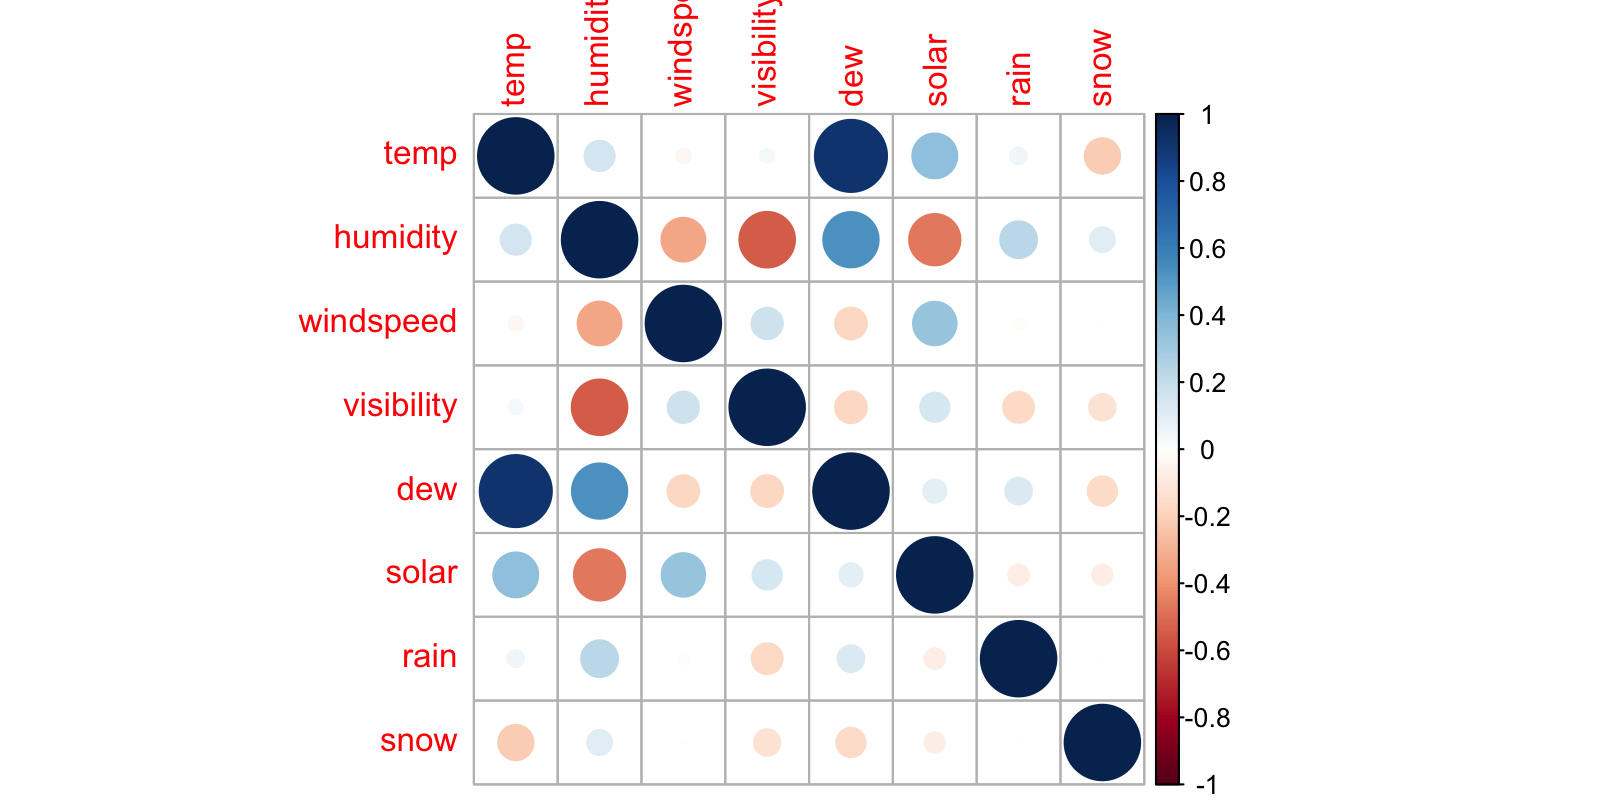

In [36]:
# Correlation plot
corrplot(cor(bike_var), use = "complete.obs", method="circle")

In [39]:
# Variance inflation factor selection (<5)
## all variables
model_vif1 <- lm(count~ temp + humidity + windspeed + visibility + dew + solar + rain + snow, data = bike)
vif(model_vif1)

temp   humidity  windspeed visibility        dew      solar       rain 
 86.645176  20.322769   1.202305   1.555524 115.474242   1.981945   1.081664 
      snow 
  1.092882

In [42]:
## remove dew variable
model_vif2 <- lm(count~ temp + humidity + windspeed + visibility  + solar + rain + snow, data = bike)
vif(model_vif2)

temp   humidity  windspeed visibility      solar       rain       snow 
  1.543508   2.388271   1.199073   1.544104   1.890727   1.067180   1.087586

As a general rule of thumb, a variance inflation factor of 5 is used to select for variables that have zero to moderate correlation (O'brien, 2007). Based on the correlation plot and variance inflation factor, we notice that temperature and dew are quite correlated with one another. Additionally, the variance inflation factor for humidity (>5) suggests high correlation with other variables. We removed the dew point variable which reduced the correlation between temperature and humidity since dew point is the temperature to which air must be cooled to become saturated with water vapor and is affected by humidity. 

## Methods: Plan

## References
O’brien, R. M. (2007). A caution regarding rules of thumb for variance inflation factors. Quality &amp; Quantity, 41(5), 673–690. https://doi.org/10.1007/s11135-006-9018-6 

Wickham, H. (2014). Tidy Data. Journal of Statistical Software, 59(10). https://doi.org/10.18637/jss.v059.i10 